In [1]:

get_ipython().run_line_magic('config', 'Completer.use_jedi = False')

# %autoreload makes Jupyter to reload modules before executing the cell
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
get_ipython().run_line_magic('matplotlib', 'inline')

import copy
import os
working_dir= os.getcwd()

In [2]:

os.chdir("../src")
from MicrobiotaGAN.generator import Generator
from MicrobiotaGAN.discriminator import Discriminator
from MicrobiotaGAN.cost import wasserstein_generator_cost
from MicrobiotaGAN.cost import wasserstein_discriminator_cost
from MicrobiotaGAN.input_noise_sample import input_noise_sample
from MicrobiotaGAN.dataset_manager import DataSetManager 
from MicrobiotaGAN.glv_loss import GLV_Model
from MicrobiotaGAN.utilities import *
from MicrobiotaGAN.computational_graphs import *

os.chdir(working_dir)

In [3]:

import tensorflow as tf 

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


Default GPU Device: /device:GPU:0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns 
sns.set()

In [5]:
from snippets import *

## Gaussian Distribution Data

In [6]:
def plot_normal(data, mu, sigma):
    count, bins, ignored = plt.hist(data, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),  linewidth=2, color='r')

In [7]:
mu, sigma = 0, 0.1 # mean and standard deviation
n_train_samples = 60000
numero_especies = 100

train_data = np.random.normal(mu, sigma, (n_train_samples,numero_especies))
print(train_data.shape)



(60000, 100)


(100,)


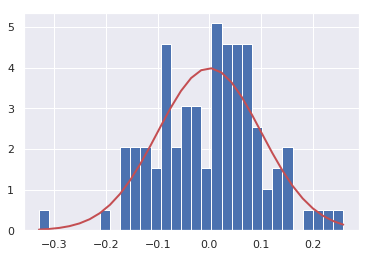

In [8]:
# Ejemplo de datos generados 
current = train_data[120,:]
print(current.shape)
plot_normal(current, mu, sigma)

In [9]:
microbiota_train_set = DataSetManager(train_data, norm=False)

## Training Loop

In [10]:
 
n_species : int = numero_especies
mini_batch_size : int =32

noise_dim : int = 10
noise_sample = tf.placeholder(tf.float32, shape=[None, noise_dim])


In [11]:
noise_dim: int = 10
noise_sample = tf.placeholder(tf.float32, shape=[None, noise_dim])



# Computation Graph Definition
my_generator = Generator(noise_dim, n_species)
my_discriminator = Discriminator(n_species)

train_real_sample, train_noise_sample, G_cost_train, G_train_step, D_cost_train, D_train_step, clip_D, D_logit_real_train, D_logit_fake_train, train_graph_saver = train_graph(
    my_discriminator, my_generator, n_species, noise_dim)

inference_real_sample, inference_noise_sample, G_cost_inference, D_cost_inference, clip_D, test_graph_saver = inference_graph(
    my_discriminator, my_generator, n_species, noise_dim)



In [12]:
graph_train_operations = [train_real_sample, train_noise_sample ,D_cost_train, clip_D, D_train_step, G_train_step, G_cost_train, train_graph_saver]

In [13]:
# Training Loop

d_train_cost = []
g_train_cost = []

epoch_record = []

glv_std_error_record = []
glv_cost_record = []

total_epochs = 10000

for k in range(total_epochs//5):

    dis_cost, gen_cost = train_gan(microbiota_train_set, graph_train_operations, mini_batch_size, 5 , my_discriminator, my_generator)

    for e in range(len(dis_cost)):   
        d_train_cost.append(dis_cost[e])

    for e in range(len(gen_cost)):    
        g_train_cost.append(gen_cost[e])

    epoch_record.append( microbiota_train_set.epochs_completed)


    print("Training epoch completed <"+str(k)+">"+" out of <"+str(total_epochs//5)+">")
    print("Generator Loss: "+str(gen_cost[-1]))
    print("Discriminator Loss: "+str(dis_cost[-1]))


Starting Traning Loop 

27.43967541800157 s
Training epoch completed <0> out of <2000>
Generator Loss: 0.32270214
Discriminator Loss: 0.20677608
Starting Traning Loop 

27.384642349999922 s
Training epoch completed <1> out of <2000>
Generator Loss: 0.3102355
Discriminator Loss: 0.20272525
Starting Traning Loop 

28.71103439899889 s
Training epoch completed <2> out of <2000>
Generator Loss: 0.32048166
Discriminator Loss: 0.19899648
Starting Traning Loop 

30.467129229997227 s
Training epoch completed <3> out of <2000>
Generator Loss: 0.32059106
Discriminator Loss: 0.19548923
Starting Traning Loop 

29.053838296000322 s
Training epoch completed <4> out of <2000>
Generator Loss: 0.30470148
Discriminator Loss: 0.20566906
Starting Traning Loop 

27.416880582997692 s
Training epoch completed <5> out of <2000>
Generator Loss: 0.29848048
Discriminator Loss: 0.19136533
Starting Traning Loop 

26.968681889000436 s
Training epoch completed <6> out of <2000>
Generator Loss: 0.3209013
Discriminator

KeyboardInterrupt: 

In [14]:
muestra_gan = draw_gan_samples(my_generator, number_of_samples_to_draw=1)
muestra_gan = muestra_gan.T
print(muestra_gan.shape)
print(muestra_gan[0:5,0])

(100, 1)
[0.71214265 0.5512891  0.2691831  0.43695563 0.68614084]


Mu original
0
Sigma orignal
0.1
<======>
Mu aprendida 
0.46992522
Sigma aprendida
0.19827084
Maximo
0.8859039
Minimo
0.12760878


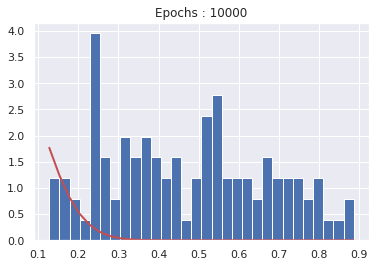

In [15]:
plot_normal(muestra_gan, mu, sigma)
print("Mu original")
print(mu)
print("Sigma orignal")
print(sigma)

print("<======>")
print("Mu aprendida ")
print(np.mean(muestra_gan))

print("Sigma aprendida")
print(np.std(muestra_gan))

print("Maximo")
print(np.max(muestra_gan))

print("Minimo")
print(np.min(muestra_gan))

plt.title("Epochs : "+str(total_epochs))
plt.savefig("gan_normal_data.png")


In [16]:
original = mnist[2,1:].reshape(28,28)


normalizado = np.multiply(original, 1.0/255)
plt.imshow(normalizado)
plt.savefig("Original.png")


NameError: name 'mnist' is not defined

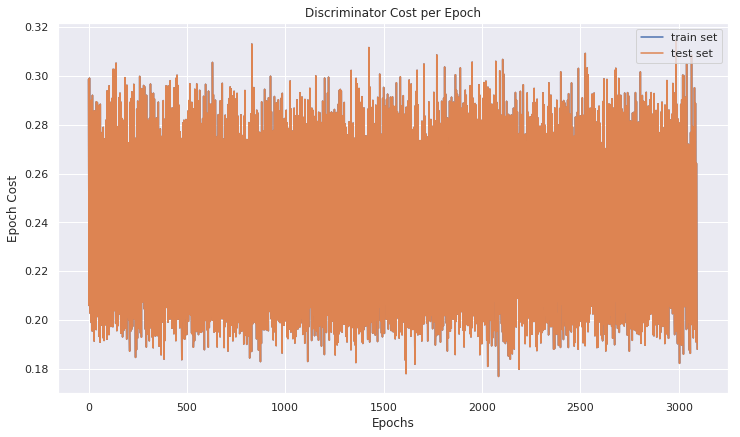

In [17]:
plot_cost(d_train_cost,d_train_cost, "Discriminator")

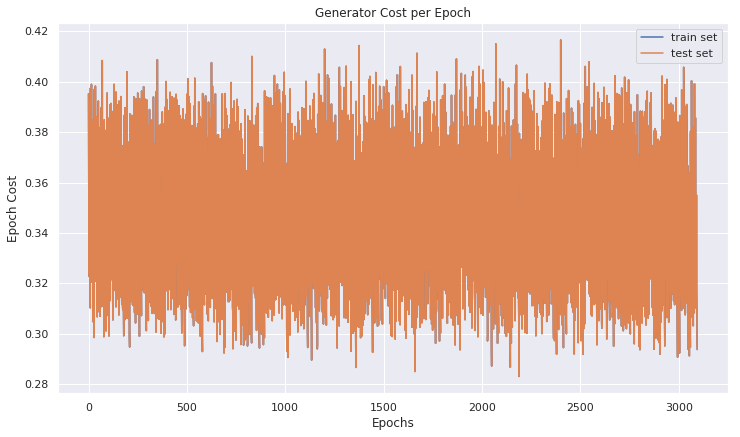

In [18]:
plot_cost(g_train_cost,g_train_cost, "Generator")

In [ ]:
# NOTE: use the saver from the training graph

test_train_operations = [inference_real_sample, inference_noise_sample, D_cost_inference, clip_D,  G_cost_inference, train_graph_saver]

In [ ]:
d_test_cost, g_test_cost = test_gan( microbiota_test_set, test_train_operations, mini_batch_size, total_epochs)

In [ ]:
plot_cost(d_train_cost,d_test_cost, "Discriminator")

In [ ]:
plot_cost(g_train_cost,g_test_cost, "Generator")

In [ ]:
# Quick Test
n_samples = 10000
gan_samples = draw_gan_samples(my_generator, number_of_samples_to_draw=n_samples)
gan_samples =  inverse_pseudo_log_transformation(gan_samples)

In [ ]:
def vector_glv_error(samples,m_A, m_r):
    error_record = []
    for k in range(len(samples)):
        e = GLV_Model(samples[k,:],m_A, m_r)
        error_record.append(e)
    return np.array(error_record)
    

In [ ]:
transformed_abundance = copy.copy(microbiota_table)

rnd_index = np.random.randint(low=1, high=microbiota_table.shape[0],size=n_samples)

sub_ds = inverse_pseudo_log_transformation(transformed_abundance[rnd_index])

gan_samples_error      = vector_glv_error(gan_samples,m_A, m_r)
original_samples_error = vector_glv_error(sub_ds,m_A, m_r)

In [ ]:
current_epochs = microbiota_train_set.epochs_completed 
plot_glv_error_boxplot(gan_samples_error, original_samples_error, current_epochs , n_samples)

In [ ]:
plot_glv_epoch_standard_error(epoch_record, glv_std_error_record)

In [ ]:
plot_glv_cost(epoch_record,glv_cost_record)

In [ ]:
np.min(current_draw)